Variatinal EM

In [9]:


#EM
 
def lamda(eita):
    s=1/(1+np.exp(-eita))
    lamda=(1/(2*eita))*(s-0.5)
    return lamda


def Estep(beta_old,sigma_old,Y,X,Z,epsilon):
    N=Y.shape[0]
    #L=X.shape[1]
    K=Z.shape[1]
    Sigma=(1/sigma_old)*(np.ones(K))
    
    for i in range(N):
        Sigma=Sigma+2*lamda(np.sqrt(epsilon[i]))*Z[i,]#(np.outer(Z[i,],Z[i,]).diagonal())
    
    Sigma1=1/(Sigma)
    mu=np.zeros(K)
    for i in range(N):
        mu=mu+Z[i,]-2*Y[i]*Z[i,]+4*lamda(np.sqrt(epsilon[i]))*(np.dot(X[i,],beta_old))*Z[i,]
    p=-0.5*Sigma1*mu
    list1=[p,Sigma1]
    return list1

def Mstep(beta_old,sigma_old,Y,X,Z,epsilon,p,Sigma):
    epsilon_new=epsilon
    N=Y.shape[0]
    L=X.shape[1]
    K=Z.shape[1]    
    for i in range(N):
        epsilon_new[i]=np.dot(Sigma,Z[i,])+(np.dot(p,Z[i,]))**2+2*(np.dot(X[i,],beta_old))*(np.dot(Z[i,],p))+(np.dot(X[i,],beta_old))**2
    S=np.zeros((L,L))
    M=np.zeros(L)
    for i in range(N):
        S=S+2*lamda(np.sqrt(epsilon_new[i]))*np.outer(X[i,],X[i,])
        M=M+Y[i]*X[i,]-2*lamda(np.sqrt(epsilon_new[i]))*(np.dot(Z[i,],p))*X[i,]-0.5*X[i,]
    beta_new=np.matmul(np.linalg.inv(S),M)
    sigma_new=(np.dot(p,p)+np.sum(Sigma))/K
    list2=[beta_new,sigma_new,epsilon_new]
    return list2

PREDICTION

In [10]:
def prediction(x,beta,p,Sigma,z):#  pi
    mu=np.dot(z,p)
    sigma=np.dot(Sigma,z)# posterior mean and sigma of random effects
    def w(u):#pi
        b=1/(1+np.exp(-np.dot(x,beta)-u))
        return b
    W=np.zeros(2000)
    for i in range(2000):
        u=np.random.normal(mu, sigma, 1)# Monte carlo method
        W[i]=w(u)
    return np.mean(W)
  

    

In [12]:
def accuracy(X,Y,Z,beta_old,p,Sigma,t):
  N=X.shape[0]
  acc=0
  Y_P=np.zeros(N)
  for i in range(N):
    if prediction(X[i,],beta_old,p,Sigma,Z[i,])>t:
      Y_P[i]=1
    if Y_P[i]==Y[i]:
      acc=acc+1
      
  return acc/N

(678, 4)

PI

In [ ]:
pi=np.zeros(N)
for i in range(N):
  pi[i]= prediction(X[i,],beta_old,p,Sigma,Z[i,])
   

In [ ]:
np.mean((pi-pi_i)*(pi-pi_i))

0.005848347434545445

In [ ]:
pi_i

array([0.94227386, 0.92987622, 0.73331276, ..., 0.72094401, 0.17530028,
       0.60943317])

In [2]:
import io

import numpy as np
import pandas as pd
from sklearn import preprocessing
#X_train
from random import sample 

In [3]:
y_feature_train =  pd.read_csv('xlabel.csv')
print(y_feature_train.shape)
folder=pd.get_dummies(y_feature_train.iloc[:,1])
folder=np.array(folder)
print(folder.shape)

y_feature_train=np.array(y_feature_train)
#y_feature_train1 =  pd.read_csv('xtlabel.csv')
#print(y_feature_train1.shape)

#y_feature_train=np.concatenate((y_feature_train,y_feature_train1),axis=0)
label=y_feature_train[:,19]#label : 1 denotes  high blood
label=label.astype(np.float32)



(4009, 20)
(4009, 339)


In [5]:
n = range(label.shape[0])
l=[]
for i in range(folder.shape[-1]):
    
    s=np.array(n)[(folder[:,i])>0]
    S=sample(list(s),2)
    l.append(S)



In [6]:
l=np.array(l).reshape(2*len(l),)   
l#test sample
left=np.setdiff1d(n, l)#train number
labeltrain=label[left,]
labeltest=label[l,]
#folder=y_feature_train[:,1]
#folder=pd.get_dummies(folder)
folder.shape

(4009, 339)

In [7]:
#folder=np.array(folder)
foldertrain=folder[left,]
foldertest=folder[l,]
gender=pd.get_dummies(y_feature_train[:,12])
position=pd.get_dummies(y_feature_train[:,11])
#drug=pd.get_dummies(y_feature_train[:,16])
#cali=pd.get_dummies(y_feature_train[:,18])
a=[13,14,15]
#feature3=y_feature_train[:, a]# delete idx
#frames=[feature3,folder,drug,cali,gender,position]
#frames=[feature3,position]
#feature=np.concatenate(frames,axis=1)
#idn=np.array(y_feature_train.iloc[:,0])
#feature=np.array(feature).astype(float)
#feature[:,0:3]=preprocessing.scale(feature[:,0:3])
feature3=y_feature_train[:, a]
feature=preprocessing.scale(feature3)
#feature[0,]
print(feature.shape)
featuretrain=feature[left,]

featuretest=feature[l,]

(4009, 3)


In [ ]:
feature3

array([[64, 69.0, 165],
       [64, 69.0, 165],
       [64, 69.0, 165],
       ...,
       [65, 70.0, 166],
       [65, 70.0, 166],
       [65, 70.0, 166]], dtype=object)

In [8]:
X_train=featuretrain
X_test=featuretest
y_train=labeltrain
y_test=labeltest.astype(float)
z_train=foldertrain
z_test=foldertest.astype(float)

In [13]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=0, solver='lbfgs')
a=logmodel.fit(X_train,y_train)

beta_old=np.append(logmodel.intercept_,logmodel.coef_)#.reshape(X_train.shape[1]+1,)


In [14]:
X=np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1).astype(float)
X[0,]
beta_old=np.random.random(X.shape[1])

In [15]:
Y=y_train
Z=z_train.astype(float)
Z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
sigma_old=1
N=X.shape[0]
epsilon=np.zeros(N)
for i in range(N):
    epsilon[i]=sigma_old*np.dot(Z[i,],Z[i,])+(np.dot(X[i,],beta_old))**2

In [17]:
K=Z.shape[1] 
epochs=200
g=-100000000
for e in range(epochs):
    p,Sigma=Estep(beta_old,sigma_old,Y,X,Z,epsilon)
    beta_old,sigma_old,epsilon=Mstep(beta_old,sigma_old,Y,X,Z,epsilon,p,Sigma)
    g_old=g
    g=-0.5*K*np.log(sigma_old)+0.5*np.sum(np.log(Sigma))#lower bound
    for i in range(N):
        g=g+Y[i]*(np.dot(Z[i,],p)+np.dot(X[i,],beta_old))-lamda(np.sqrt(epsilon[i]))*(np.dot(Sigma,Z[i,])+(np.dot(p,Z[i,]))**2+2*(np.dot(X[i,],beta_old))*(np.dot(Z[i,],p))+(np.dot(X[i,],beta_old))**2-epsilon[i])-0.5*(np.dot(Z[i,],p))-0.5*(np.dot(X[i,],beta_old))-0.5*np.sqrt(epsilon[i])+np.log(1/(1+np.exp(-np.sqrt(epsilon[i]))))
    #if g。g_
    if abs(g-g_old)<0.001:
      break
    
    print(g)

-1620.0997337678211
-1536.795159978033
-1507.2850861249042
-1492.8982173160632
-1484.7152061108786
-1479.5736230960401
-1476.1101629997236
-1473.65665914319
-1471.853126939309
-1470.4905909905299
-1469.4400601124285
-1468.6176951700747
-1467.966568949618
-1467.4465777113464
-1467.0285906184572
-1466.6909096488498
-1466.4170423543096
-1466.194248901772
-1466.0125618525155
-1465.8641042386694
-1465.742601921213
-1465.6430263765487
-1465.5613275846063
-1465.4942308219536
-1465.4390798648033
-1465.393714601868
-1465.3563746140758
-1465.325622642642
-1465.3002834761849
-1465.2793949124994
-1465.2621682517192
-1465.2479563641832
-1465.2362278093758
-1465.2265458106804
-1465.2185511412313
-1465.2119481686734
-1465.2064934592415
-1465.2019864588165
-1465.1982618642328
-1465.1951833704331
-1465.1926385414513
-1465.1905345993089
-1465.1887949635964
-1465.1873564062557
-1465.1861667106323


In [19]:
accuracy(X,Y,Z,beta_old,p,Sigma,0.5)

0.8420894626238367

In [27]:
#TEST
X=np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1).astype(float)
X.shape
Y=y_test
Z=z_test
h_test_list=[]# POSITIVE ACCUARACY
n_test_list=[]#NEGTIVE ACCURACY

for i in range(20):
    T=0.05*i
    acp=accuracy(X[Y==0],Y[Y==0],Z[Y==0],beta_old,p,Sigma,T)
    acn=accuracy(X[Y==1],Y[Y==1],Z[Y==1],beta_old,p,Sigma,T)
    h_test_list.append(acp)
    n_test_list.append(acn)

#X.shape,y_test.shape,z_test.shape

#ROC curve

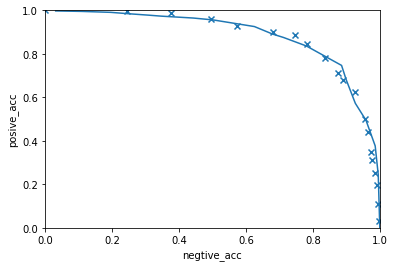

In [28]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlim((0, 1))

plt.ylim((0, 1))
plt.plot(n_test_list,  h_test_list)                    
plt.scatter(h_test_list, n_test_list, marker='x')
plt.ylabel('posive_acc')
plt.xlabel('negtive_acc')

plt.show()